In [1]:
from BOVW import BOVW
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import pickle, dill

In [2]:
path = "../../../dataset/train/"
path_val = "../../../dataset/valid/"
path_test = "../../../dataset/test/"

val_images_path = list(Path(path_val).rglob(f"*.jpg"))
test_images_path = list(Path(path_test).rglob(f"*.jpg"))

In [3]:
bovw = BOVW(num_cluster=150, step_size=15)

In [4]:
train_hist, labels, train_paths = bovw.create_train_Vocabulary(path, "jpg", "./bovw_withus")

Extracting SIFT from image ..\..\..\dataset\train\unsavory\5610.jpg...: 100%|██████████| 11280/11280 [05:02<00:00, 37.31it/s]                    


Visual words computed in: 15888.362365
BOVW computed in: 16.429736799998864
SVC fitted in: 4.06148199999916
KNN fitted in: 0.004704400000264286
Random Forest fitted in: 2.66678630000024


              precision    recall  f1-score   support

      savory       0.94      0.91      0.92      5670
    unsavory       0.91      0.94      0.92      5610

    accuracy                           0.92     11280
   macro avg       0.92      0.92      0.92     11280
weighted avg       0.92      0.92      0.92     11280



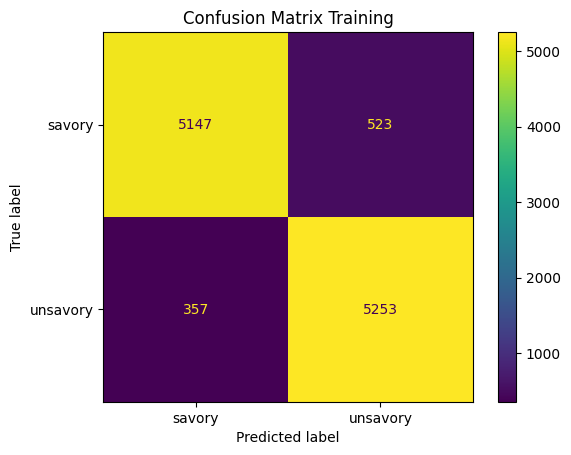

In [5]:
print(classification_report(labels, bovw.model.predict(train_hist)))

ConfusionMatrixDisplay.from_estimator(bovw.model, train_hist, labels)
plt.title("Confusion Matrix Training")
plt.show()

c:\Users\Alessandro\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

      savory       0.94      0.72      0.81      5670
    unsavory       0.77      0.95      0.85      5610

    accuracy                           0.83     11280
   macro avg       0.85      0.83      0.83     11280
weighted avg       0.85      0.83      0.83     11280



c:\Users\Alessandro\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


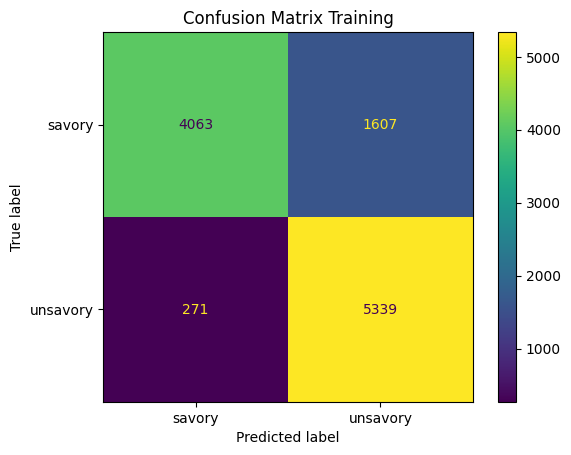

In [6]:
print(classification_report(labels, bovw.knn.predict(train_hist)))

ConfusionMatrixDisplay.from_estimator(bovw.knn, train_hist, labels)
plt.title("Confusion Matrix Training")
plt.show()

              precision    recall  f1-score   support

      savory       1.00      1.00      1.00      5670
    unsavory       1.00      1.00      1.00      5610

    accuracy                           1.00     11280
   macro avg       1.00      1.00      1.00     11280
weighted avg       1.00      1.00      1.00     11280



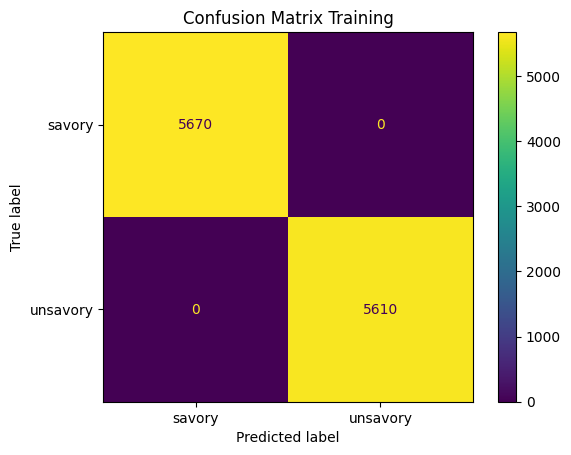

In [7]:
print(classification_report(labels, bovw.forest.predict(train_hist)))

ConfusionMatrixDisplay.from_estimator(bovw.forest, train_hist, labels)
plt.title("Confusion Matrix Training")
plt.show()

## Load after trainig for val phase

In [14]:
bovw = BOVW.load_model('./bovw_withus/bovw.pkl')

Extracting SIFT from image ..\..\..\dataset\valid\unsavory\300.jpg...: 100%|██████████| 600/600 [00:08<00:00, 68.02it/s]


BOVW computed in: 0.7546068000010564
              precision    recall  f1-score   support

      savory       0.84      0.84      0.84       300
    unsavory       0.84      0.84      0.84       300

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



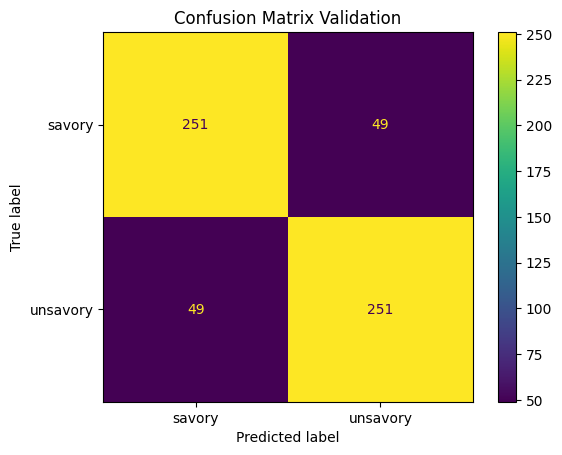

In [9]:
descr_val, labels_val, val_path = bovw.extract_Sifts(path_val, 'jpg')
histogram_val = bovw.compute_histogram(descr_val, labels_val)
predictions_val =  [i for i in bovw.model.predict(histogram_val)]

print(classification_report(labels_val, bovw.model.predict(histogram_val)))

ConfusionMatrixDisplay.from_estimator(bovw.model, histogram_val, labels_val)
plt.title("Confusion Matrix Validation")
plt.show()

c:\Users\Alessandro\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Alessandro\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eli

              precision    recall  f1-score   support

      savory       0.83      0.56      0.67       300
    unsavory       0.67      0.88      0.76       300

    accuracy                           0.72       600
   macro avg       0.75      0.72      0.72       600
weighted avg       0.75      0.72      0.72       600



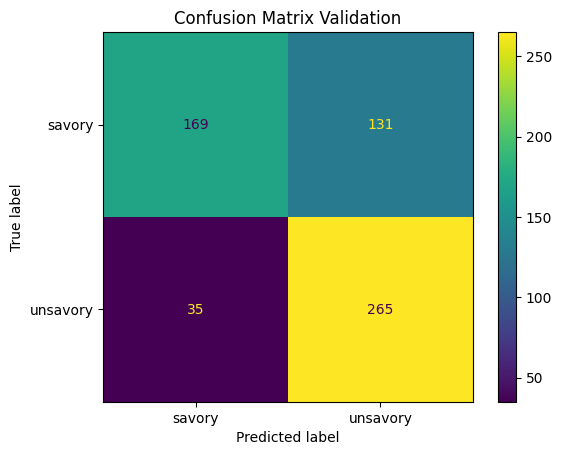

In [10]:
print(classification_report(labels_val, bovw.knn.predict(histogram_val)))

ConfusionMatrixDisplay.from_estimator(bovw.knn, histogram_val, labels_val)
plt.title("Confusion Matrix Validation")
plt.show()

              precision    recall  f1-score   support

      savory       0.81      0.82      0.82       300
    unsavory       0.82      0.81      0.81       300

    accuracy                           0.81       600
   macro avg       0.82      0.81      0.81       600
weighted avg       0.82      0.81      0.81       600



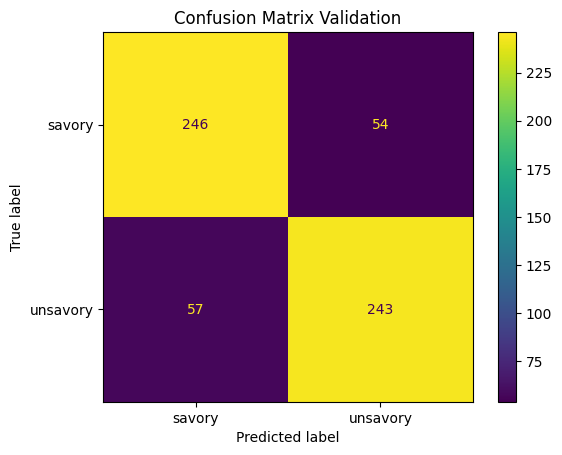

In [11]:
print(classification_report(labels_val, bovw.forest.predict(histogram_val)))

ConfusionMatrixDisplay.from_estimator(bovw.forest, histogram_val, labels_val)
plt.title("Confusion Matrix Validation")
plt.show()

## Load after training for test phase

In [15]:
bovw = BOVW.load_model('./bovw_withus/bovw.pkl')

Extracting SIFT from image ..\..\..\dataset\test\unsavory\300.jpg...: 100%|██████████| 600/600 [00:06<00:00, 96.49it/s] 


BOVW computed in: 0.7103884999996808
              precision    recall  f1-score   support

      savory       0.94      0.86      0.90       300
    unsavory       0.87      0.95      0.91       300

    accuracy                           0.90       600
   macro avg       0.91      0.90      0.90       600
weighted avg       0.91      0.90      0.90       600



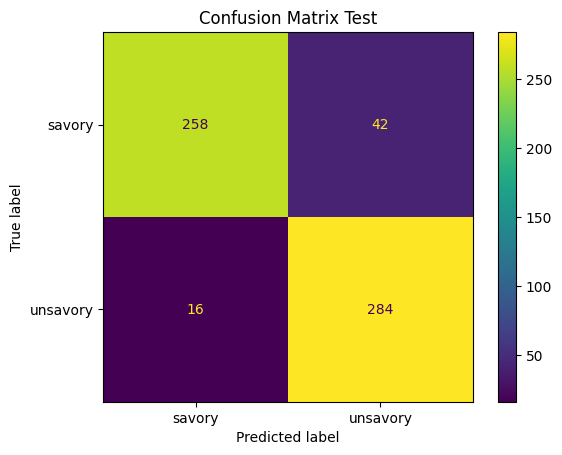

In [16]:
descr_test, labels_test, test_path = bovw.extract_Sifts(path_test, 'jpg')
histogram_test = bovw.compute_histogram(descr_test, labels_test)
predictions =  [i for i in bovw.model.predict(histogram_test)]

print(classification_report(labels_test, bovw.model.predict(histogram_test)))

ConfusionMatrixDisplay.from_estimator(bovw.model, histogram_test, labels_test)
plt.title("Confusion Matrix Test")
plt.show()

c:\Users\Alessandro\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Alessandro\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eli

              precision    recall  f1-score   support

      savory       0.93      0.67      0.78       300
    unsavory       0.74      0.95      0.83       300

    accuracy                           0.81       600
   macro avg       0.84      0.81      0.80       600
weighted avg       0.84      0.81      0.80       600



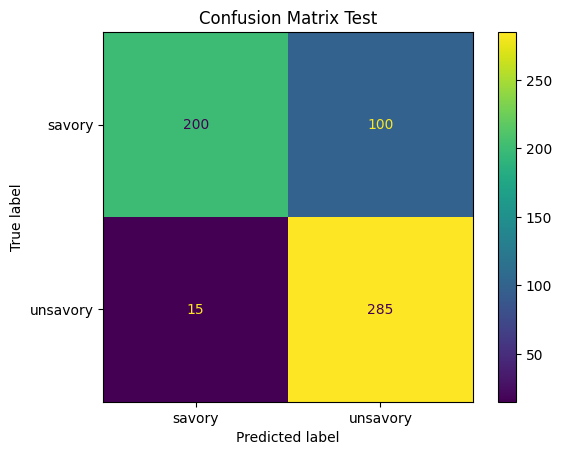

In [17]:
print(classification_report(labels_test, bovw.knn.predict(histogram_test)))

ConfusionMatrixDisplay.from_estimator(bovw.knn, histogram_test, labels_test)
plt.title("Confusion Matrix Test")
plt.show()

              precision    recall  f1-score   support

      savory       0.91      0.87      0.89       300
    unsavory       0.88      0.91      0.89       300

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



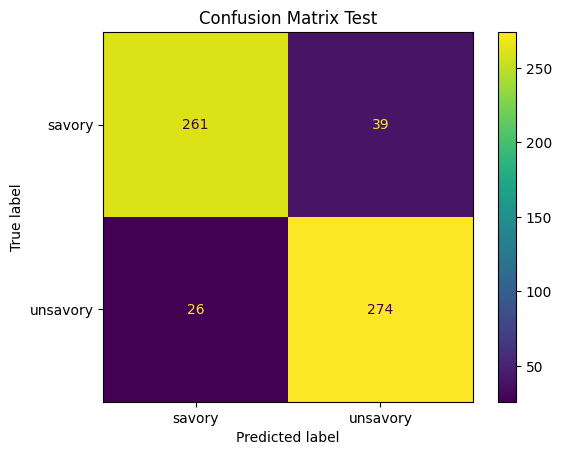

In [18]:
print(classification_report(labels_test, bovw.forest.predict(histogram_test)))

ConfusionMatrixDisplay.from_estimator(bovw.forest, histogram_test, labels_test)
plt.title("Confusion Matrix Test")
plt.show()

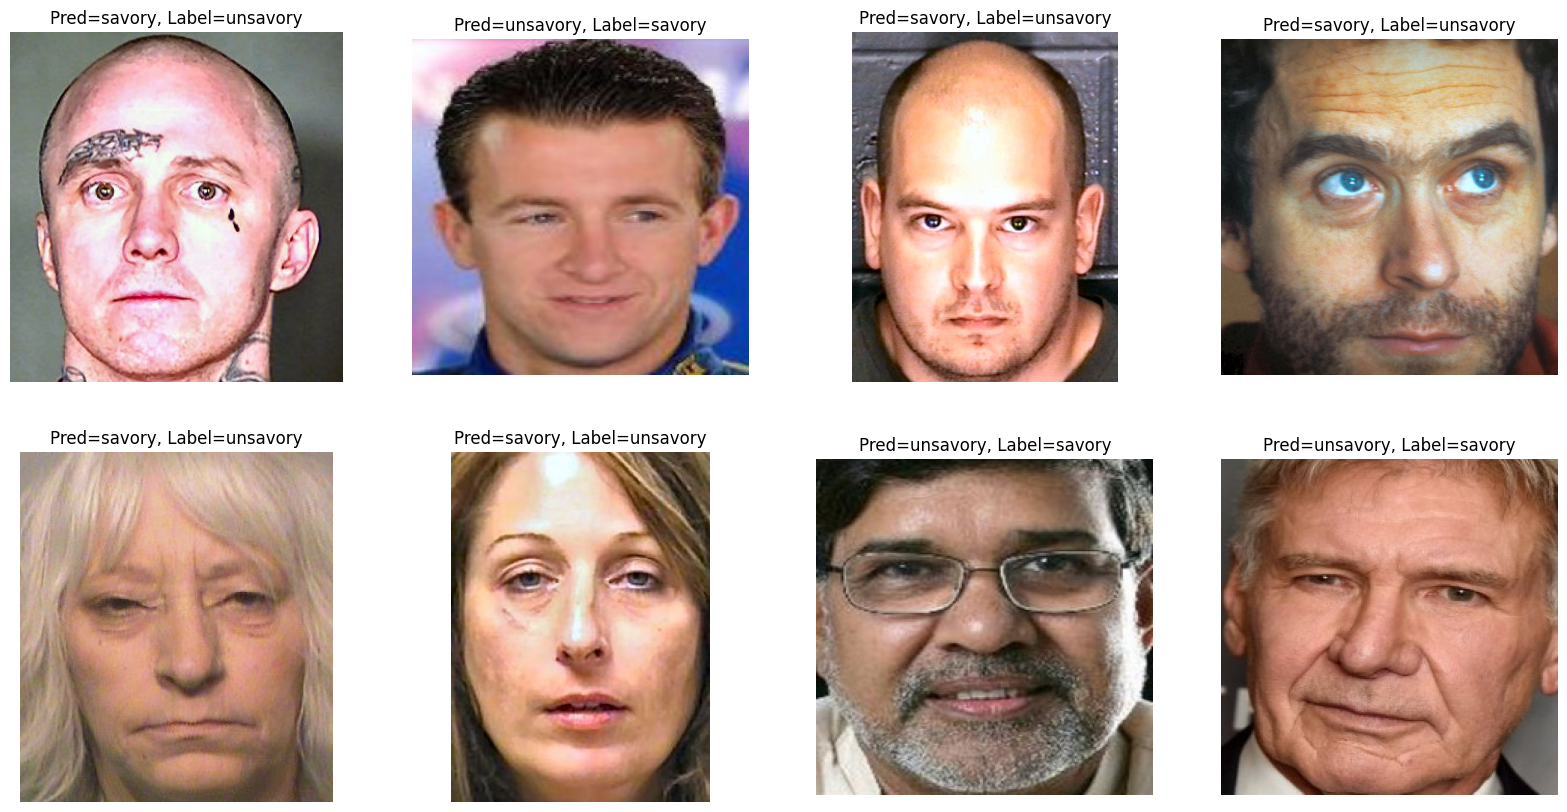

In [22]:
BOVW.show_results(bovw.model, histogram_test, labels_test, test_images_path, show_positive=False)

## CBIR from 0

In [ ]:
for p in test_images_path:
    pred, k_similar = BOVW.cbir('./bovw/bovw.pkl', p, './bovw/train_bovw.pkl', './bovw/train_paths.pkl')
    print(pred)
    print(k_similar)
    break

BOVW computed in: 0.0013032999995630234
KDTree computed in: 0.1659884000000602
10 most similar found in: 0.0016395999991800636
['savory']
['..\\dataset\\train\\savory\\3952.jpg', '..\\dataset\\train\\unsavory\\4164.jpg', '..\\dataset\\train\\savory\\2596.jpg', '..\\dataset\\train\\unsavory\\1181.jpg', '..\\dataset\\train\\unsavory\\5263.jpg', '..\\dataset\\train\\unsavory\\3368.jpg', '..\\dataset\\train\\unsavory\\3015.jpg', '..\\dataset\\train\\unsavory\\1760.jpg', '..\\dataset\\train\\savory\\5340.jpg', '..\\dataset\\train\\unsavory\\2566.jpg']


In [20]:
feature_path = "./bovw_withus/train_bovw.pkl"
labels_path = "../Color/color_withus/train_labels.pkl"
#
with open(feature_path, 'rb') as f: feature = dill.load(f)
with open(labels_path, 'rb') as f: labels = dill.load(f)
#
feature_savory = [feature[i] for i in np.where(np.asarray(labels)=='savory')[0]]
feature_unsavory = [feature[i] for i in np.where(np.asarray(labels)=='unsavory')[0]]
#
with open("./bovw_withus/feature_savory.pkl", 'wb') as f: feature = dill.dump(feature_savory, f)
with open("./bovw_withus/feature_unsavory.pkl", 'wb') as f: feature = dill.dump(feature_unsavory, f)